In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [109]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [111]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


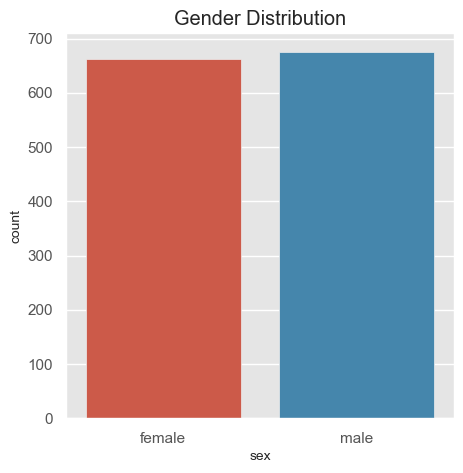

In [112]:
from matplotlib import style
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

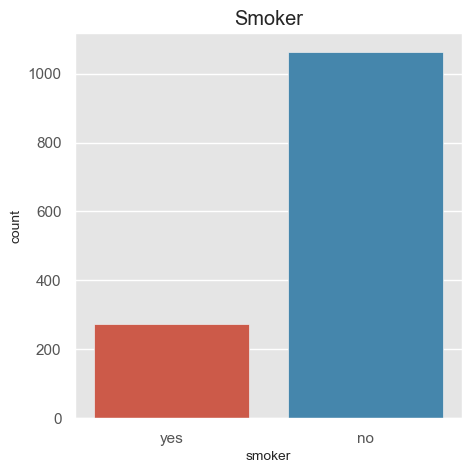

In [113]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

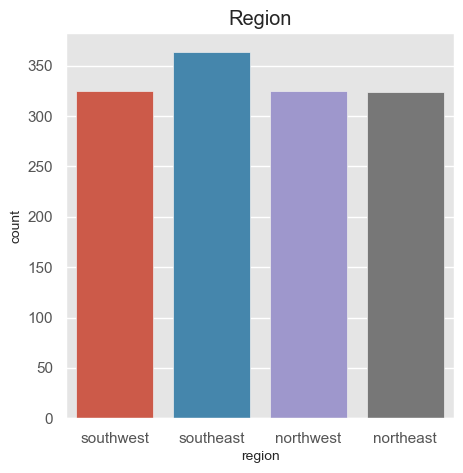

In [114]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

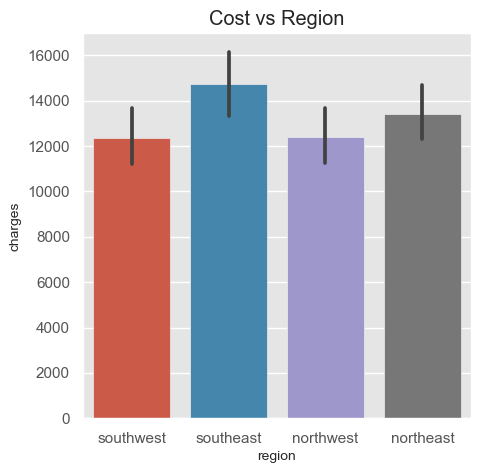

In [115]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

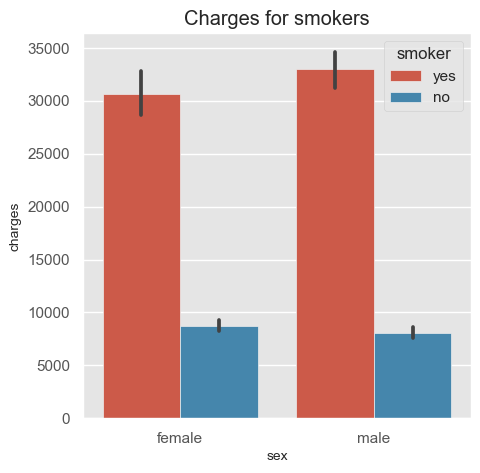

In [116]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

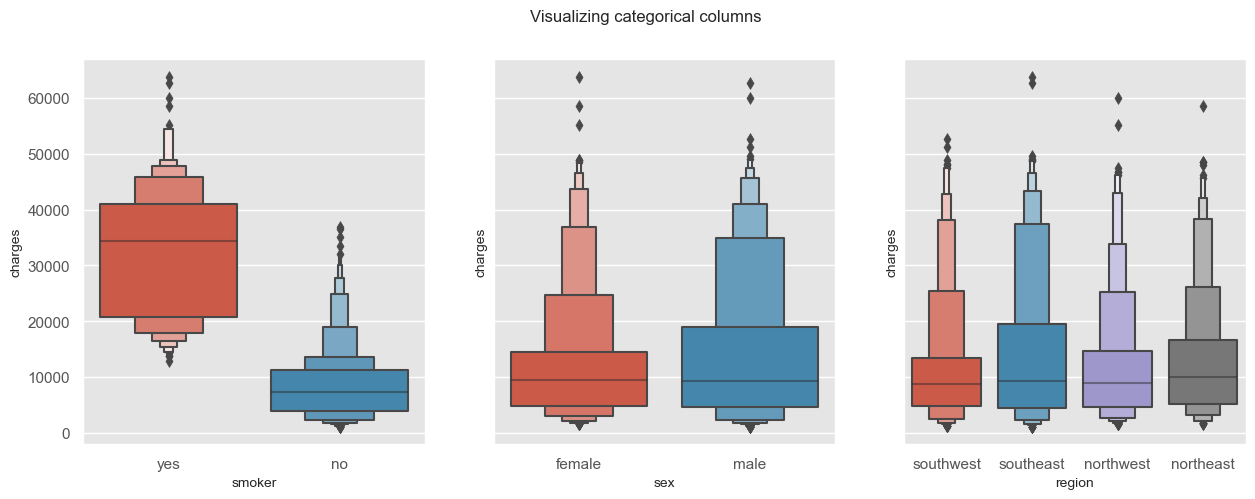

In [117]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [120]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


<Axes: xlabel='region', ylabel='Count'>

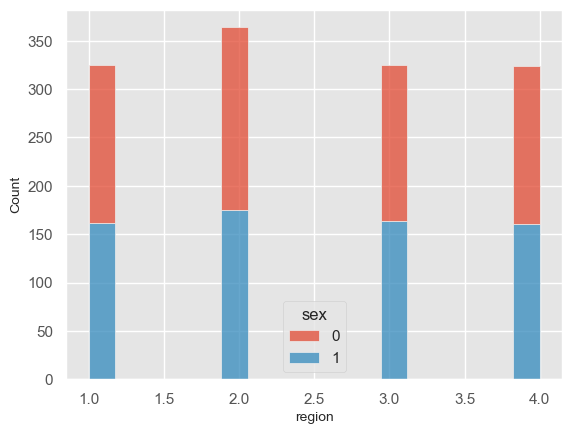

In [121]:
sns.histplot(data=df,x='region',hue='sex',multiple='stack')

<Axes: xlabel='age', ylabel='Count'>

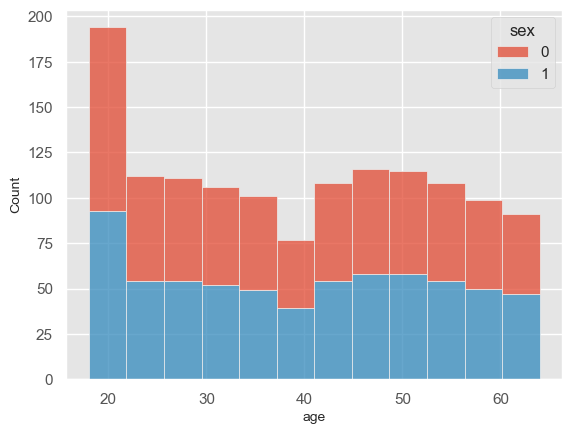

In [122]:
sns.histplot(data=df,x='age',hue='sex',multiple='stack')

<Axes: xlabel='bmi', ylabel='Count'>

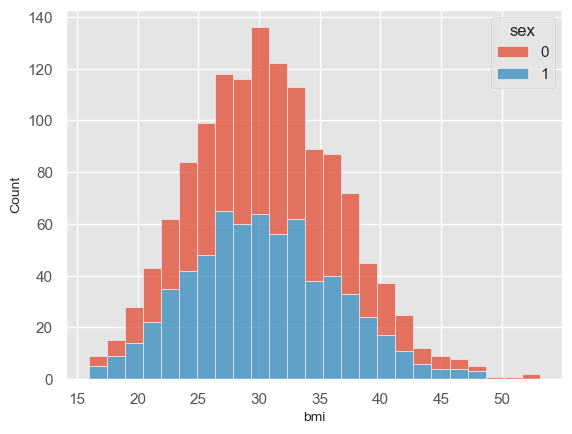

In [123]:
sns.histplot(data=df,x='bmi',hue='sex',multiple='stack')

<Axes: xlabel='children', ylabel='Count'>

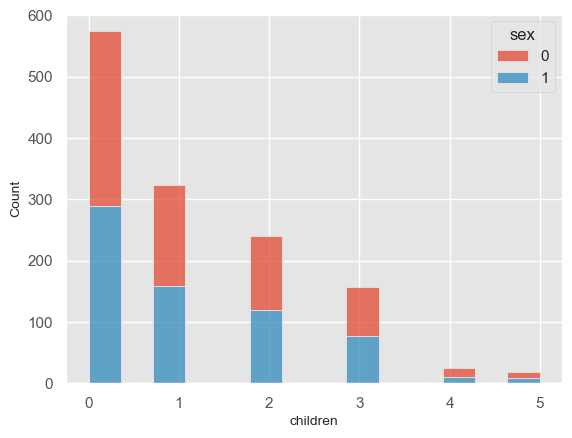

In [124]:
sns.histplot(data=df,x='children',hue='sex',multiple='stack')

<Axes: xlabel='charges', ylabel='Count'>

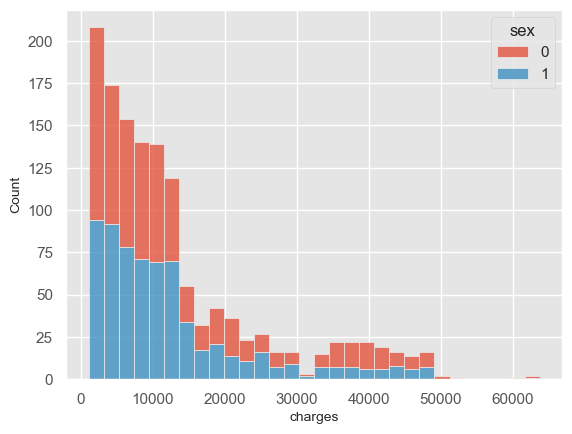

In [125]:
sns.histplot(data=df,x='charges',hue='sex',multiple='stack')

In [126]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)]
data_clean.shape

(1309, 7)

<Axes: >

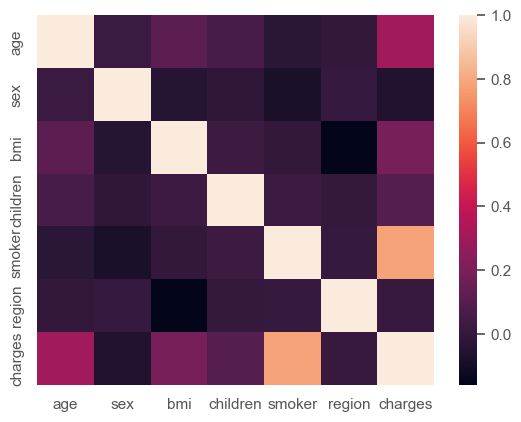

In [128]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [129]:
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [131]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
from sklearn.metrics import mean_absolute_error,r2_score
pred = model.predict(X_test)
print("R2 score: ",(r2_score(y_test, pred)))
print("Mean Absolute Error :", round(mean_absolute_error(y_test, pred)))

R2 score:  0.7998358738159363
Mean Absolute Error : 3932


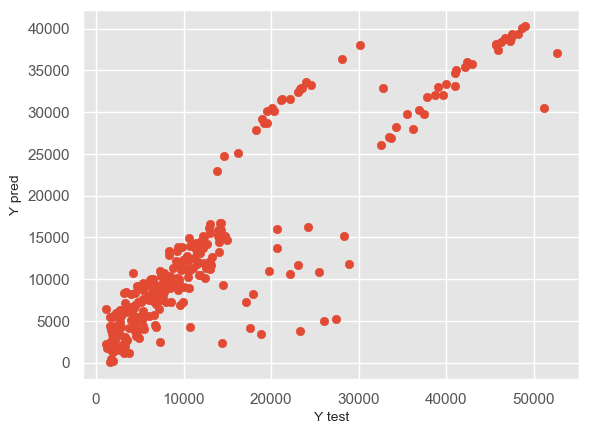

In [133]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [134]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [135]:
cost_pred = model.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33114.22085277]


In [136]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [137]:
from sklearn.metrics import mean_absolute_error,r2_score
pred = svr.predict(X_test)
print("R2 score: ",(r2_score(y_test, pred)))
print("Accuracy Score :", round(mean_absolute_error(y_test, pred)))

R2 score:  -0.10350398392737459
Accuracy Score : 8566


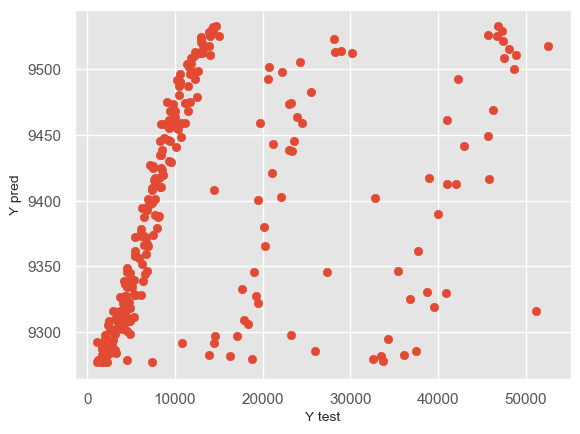

In [138]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [139]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [140]:
cost_pred = svr.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9457.35939308]


In [141]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [142]:
from sklearn.metrics import mean_absolute_error,r2_score
pred = rfr.predict(X_test)
print("R2 score: ",(r2_score(y_test, pred)))
print("Accuracy Score :", round(mean_absolute_error(y_test, pred)))

R2 score:  0.8660743135157449
Accuracy Score : 2769


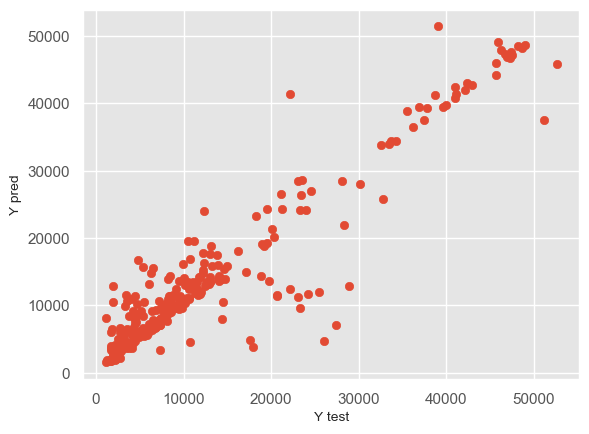

In [143]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [144]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [145]:
cost_pred = rfr.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [23793.274106]
